<a href="https://colab.research.google.com/github/VasanthPrakasam/ML--Salary-Dataset---Simple-linear-regression/blob/main/ML_Salary_Dataset_Simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression from Scratch — Salary vs Years of Experience**
- This notebook demonstrates a simple linear regression implemented from scratch (no scikit-learn).
- Me use a small salary dataset to predict Salary based on YearsExperience.




```
    Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y).

    More specifically, that y can be calculated from a linear combination of the input variables (x).

    When there is a single input variable (x), the method is referred to as simple linear regression and When more than one input variable multiple input variables.

    Different techniques can be used to prepare or train the linear regression equation from data, the most common of which is called Ordinary Least Squares. It is common to therefore refer to a model prepared this way as Ordinary Least Squares Linear Regression or just Least Squares Regression.

```





Linear Regression Equation:-

                                y = B0 + B1*x

    The linear equation assigns one scale factor to each input value or column, called a coefficient and represented by the capital Greek letter Beta (B).

    One additional coefficient is also added, giving the line an additional degree of freedom (e.g. moving up and down on a two-dimensional plot) and is often called the intercept or the bias coefficient.

    In higher dimensions when we have more than one input (x), the line is called a plane or a hyper-plane.





**Types**

    There are many more techniques because the model is so well studied.

1. Simple Linear Regression

With simple linear regression when we have a single input, we can use statistics to estimate the coefficients.

This requires that you calculate statistical properties from the data such as means, standard deviations, correlations and covariance. All of the data must be available to traverse and calculate statistics.

2. Ordinary Least Squares

When we have more than one input we can use Ordinary Least Squares to estimate the values of the coefficients.

The Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals. This means that given a regression line through the data we calculate the distance from each data point to the regression line, square it, and sum all of the squared errors together.

This approach treats the data as a matrix and uses linear algebra operations to estimate the optimal values for the coefficients. It means that all of the data must be available and you must have enough memory to fit the data and perform matrix operations.

3. Gradient Descent

When there are one or more inputs you can use a process of optimizing the values of the coefficients by iteratively minimizing the error of the model on your training data.

This operation is called Gradient Descent and works by starting with random values for each coefficient. The sum of the squared errors are calculated for each pair of input and output values. A learning rate is used as a scale factor and the coefficients are updated in the direction towards minimizing the error. The process is repeated until a minimum sum squared error is achieved or no further improvement is possible.

When using this method, you must select a learning rate (alpha) parameter that determines the size of the improvement step to take on each iteration of the procedure

4. Regularization

There are extensions of the training of the linear model called regularization methods.

These seek to both minimize the sum of the squared error of the model on the training data (using ordinary least squares) but also to reduce the complexity of the model (like the number or absolute size of the sum of all coefficients in the model).

    Two popular examples of regularization procedures for linear regression are:

Lasso Regression: where Ordinary Least Squares is modified to also minimize the absolute sum of the coefficients (called L1 regularization).

Ridge Regression: where Ordinary Least Squares is modified to also minimize the squared absolute sum of the coefficients (called L2 regularization). These methods are effective to use when there is collinearity in your input values and ordinary least squares would overfit the training data.

    Indenpendent variable(X=YearsExperience) and Dependent variable(y=Salary)



In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/salary-dataset-simple-linear-regression


In [2]:
import os
os.listdir(path)

['Salary_dataset.csv']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as sm

In [4]:
data = pd.read_csv(os.path.join(path, 'Salary_dataset.csv'))
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


# **EDA**

In [5]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [7]:
#check number of rows and number of columns
data.shape     #30 rows and 3 columns

(30, 3)

In [8]:
#check dataset information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


    Here total 30 examples with no any missing values.

    one columns is float and another is intger.


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30.0,14.500000,8.803408,0.0,7.25,14.5,21.75,29.0
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


In [11]:
#check any missing values

data.isnull().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


In [12]:
#any outliers

data.skew()

,0
Unnamed: 0,0.00000
YearsExperience,0.37956
Salary,0.35412


In [13]:
data.kurt()

,0
Unnamed: 0,-1.200000
YearsExperience,-1.012212
Salary,-1.295421


In [14]:
#check any correlation and covariance

data[['YearsExperience','Salary']].cov()


,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [16]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# **Visualisation**

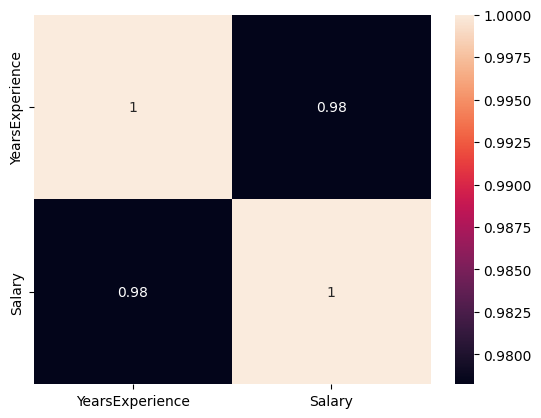

In [18]:
sns.heatmap(data.corr(),annot=True)
plt.show()

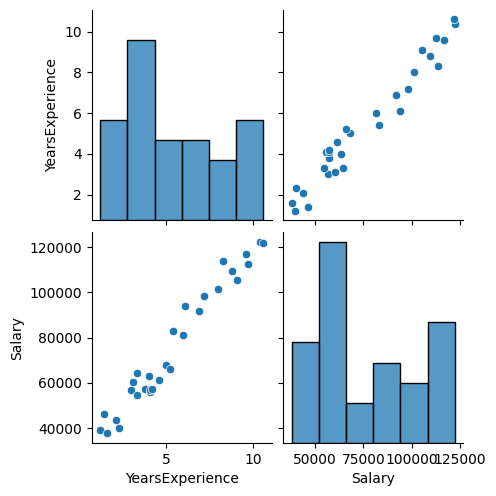

In [19]:
sns.pairplot(data)
plt.show()

- Types of Line Style

Syntax :- (data, ls='--')

    Draw a dotted line style use as ':'

    Draw a dashed line style use as '--'

    Draw a dashdot line style use as '-.'

    Draw a solid line style use as '-' (by default)

- Type of Line Color

Syntax :- (data, color='r')

    Use any color for example, color='r', 'b', 'g'

    Alos use Hexadecimal color values

       For Blue - #0000FF
       For DarkGreen - #006400
       For DarkRed - #8B000
       For DeepPink - #FF1493



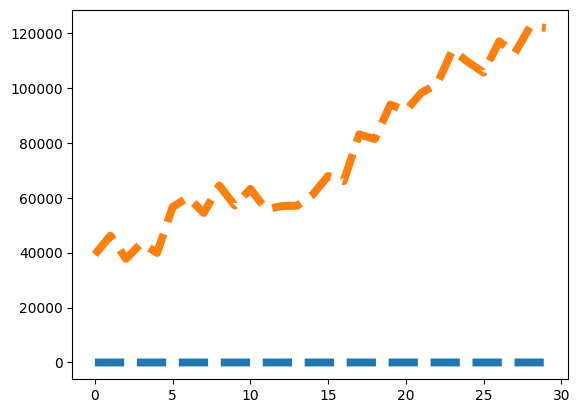

In [20]:
plt.plot(data, linestyle = '--', linewidth='5.7')

plt.show()

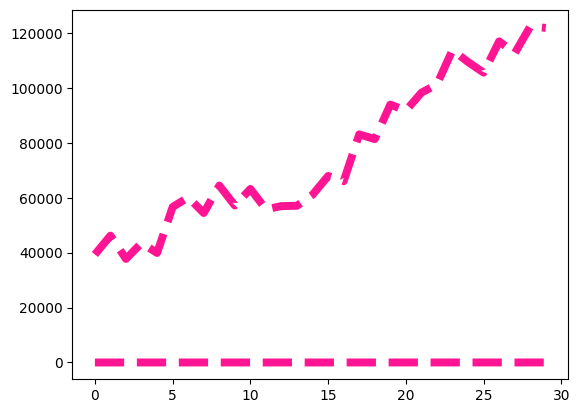

In [21]:
plt.plot(data, linestyle = '--', linewidth='5.7', color='#FF1493')

plt.show()

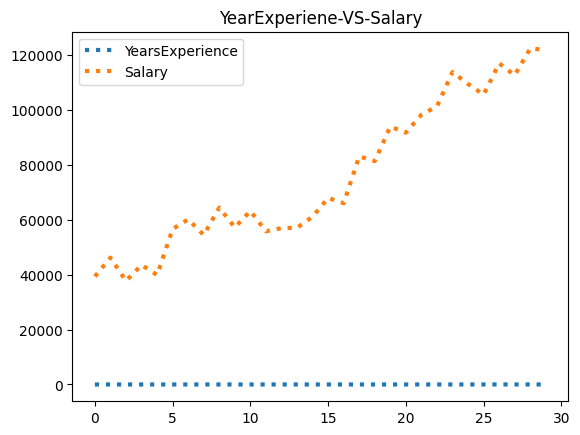

In [22]:
data.plot.line(linestyle = ':', linewidth='3')

plt.title('YearExperiene-VS-Salary')
plt.show()

# **Independent and Dependent Variables**

In [23]:
# X=df.drop('Salary',axis=1)
# y=df.Salary

In [24]:
X = data['YearsExperience']
y = data['Salary']

In [25]:
X.head()

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


In [26]:
y.head()

,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0


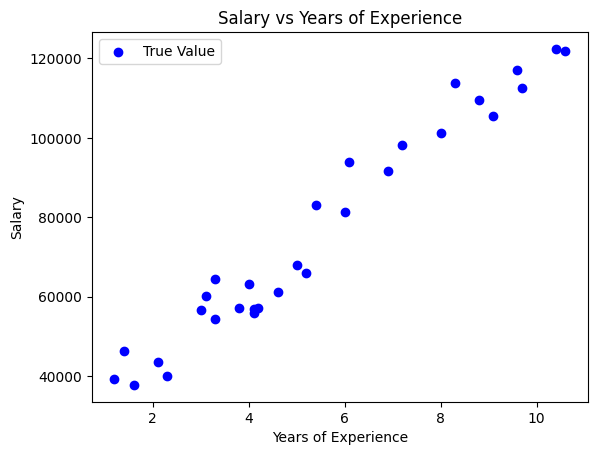

In [27]:
plt.figure()
plt.scatter(X, y, color='blue', label='True Value')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.legend()
plt.show()

# **Splitting the data**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape((len(X_test),1))
y_test = np.array(y_test).reshape((len(y_test),1))

In [29]:
print(X_train.shape)

(21, 1)


In [30]:
X_test.shape

(9, 1)

# **Model Fitting**

In [31]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
model.intercept_   # beta 0

array([24985.53016251])

In [33]:
model.coef_        # beta 1

array([[9339.08172382]])

# **Prediction**

In [34]:
y_train_pred = model.predict(X_train)

In [38]:
y_train_pred

array([[ 36192.42823109],
       [ 46465.41812729],
       [ 73548.75512635],
       [ 53002.77533396],
       [ 64209.67340254],
       [ 63275.76523015],
       [ 99698.18395303],
       [ 38060.24457585],
       [ 39928.06092062],
       [109971.17384923],
       [ 44597.60178252],
       [ 92226.91857398],
       [114640.71471114],
       [ 81020.0205054 ],
       [123979.79643495],
       [ 89425.19405684],
       [ 55804.4998511 ],
       [ 62341.85705777],
       [ 67945.30609206],
       [ 81953.92867778],
       [ 53936.68350634]])

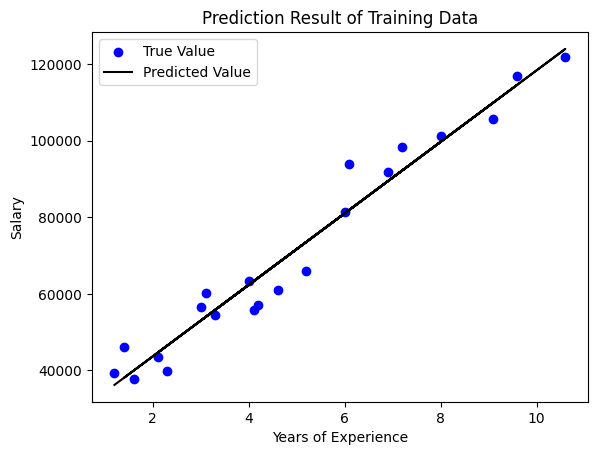

In [35]:
plt.figure()
plt.scatter(X_train, y_train, color='blue', label='True Value')
plt.plot(X_train, y_train_pred, color='black', label='Predicted Value')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Prediction Result of Training Data')
plt.legend()
plt.show()

In [36]:
y_test_pred = model.predict(X_test)

In [39]:
y_test_pred

array([[115574.62288352],
       [ 71680.93878159],
       [102499.90847018],
       [ 75416.57147111],
       [ 55804.4998511 ],
       [ 60474.04071301],
       [122111.98009019],
       [107169.44933209],
       [ 63275.76523015]])

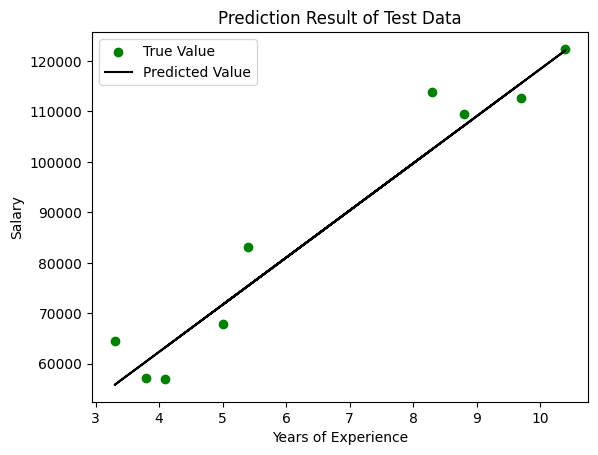

In [37]:
plt.figure()
plt.scatter(X_test, y_test, color='green', label='True Value')
plt.plot(X_test, y_test_pred, color='black', label='Predicted Value')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Prediction Result of Test Data')
plt.legend()
plt.show()

In [ ]:
print("mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred),2))
print("Explain Variance score =", round(sm.explained_variance_score(y_test, y_test_pred),2))
print("r2 score =", round(sm.r2_score(y_test, y_test_pred),2))

mean squared error = 37784662.47
Explain Variance score = 0.95
r2 score = 0.94


# **Assumptions**

In [42]:
error= y_test_pred-y_test

In [43]:
error

array([[  2938.62288352],
       [  3741.93878159],
       [-11313.09152982],
       [ -7672.42852889],
       [ -8641.5001489 ],
       [  3284.04071301],
       [  -280.01990981],
       [ -2262.55066791],
       [  6317.76523015]])

No Autocorrelation

In [44]:
import statsmodels.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


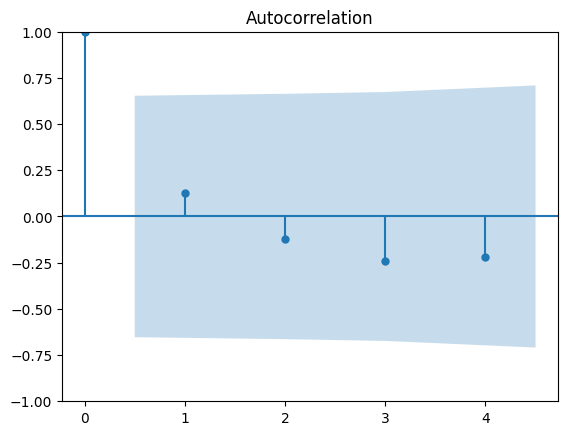

In [45]:
acf=plot_acf(error)
plt.show()

Normality

/tmp/ipython-input-3292444513.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


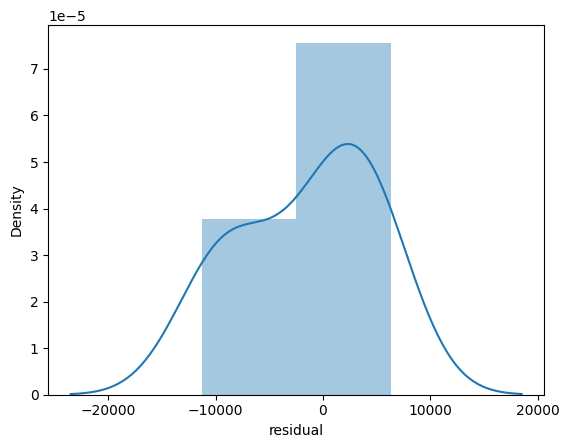

In [46]:
sns.distplot(error)
plt.xlabel('residual')
plt.show()

Linearity

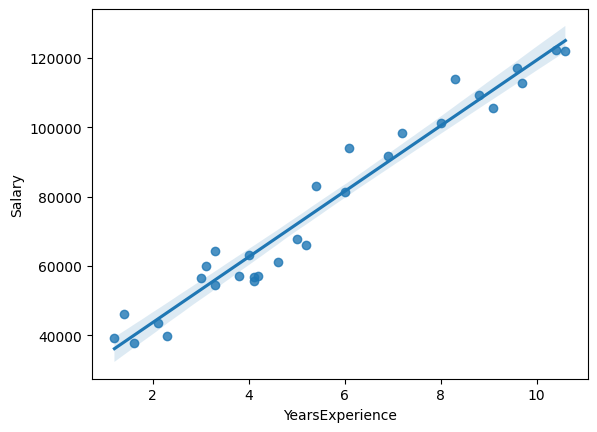

In [48]:
sns.regplot(x=X, y=y)
plt.show()

Homoscedasticity

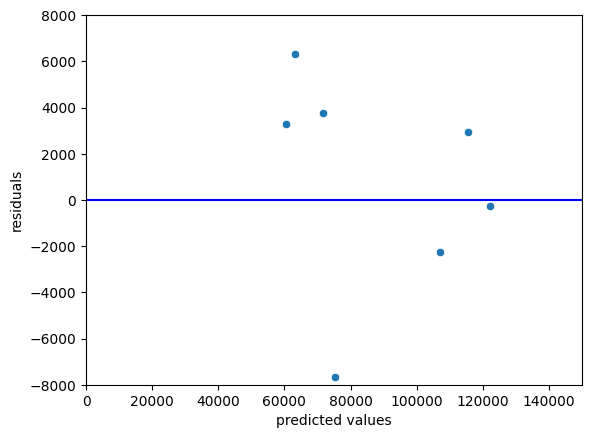

In [50]:
sns.scatterplot(x=y_test_pred.flatten(), y=error.flatten())
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.xlim([0,150000])
plt.ylim([-8000,8000])
sns.lineplot(x=[0,150000], y=[0,0], color='blue')
plt.show()

Multicollinearity

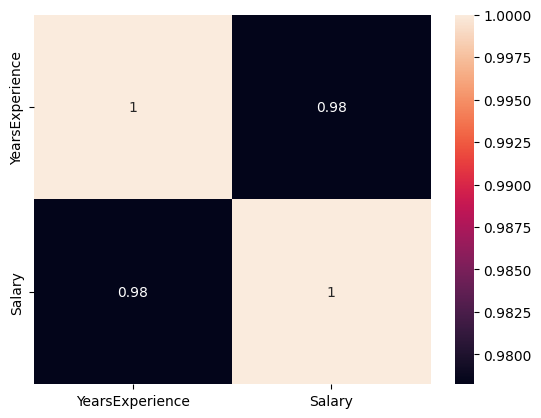

In [51]:
sns.heatmap(data.corr(),annot=True)
plt.show()